In [1]:
 !pip install urduhack tensorflow_gpu

     |████████████████████████████████| 112kB 10.9MB/s 
     |████████████████████████████████| 320.4MB 45kB/s 
     |████████████████████████████████| 3.4MB 27.4MB/s 
  Found existing installation: tensorflow-datasets 2.1.0
    Uninstalling tensorflow-datasets-2.1.0:
      Successfully uninstalled tensorflow-datasets-2.1.0


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from urduhack import normalize
from urduhack.preprocessing import preprocess
from urduhack.preprocessing import remove_punctuation, normalize_whitespace, replace_urls, remove_english_alphabets
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Conv2D, MaxPooling1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
from IPython.core.interactiveshell import InteractiveShell
import plotly
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/urdu_10k.csv', sep = ',')

df.isnull().values.any()

Mounted at /content/drive


False

In [4]:
calls_df = df.sample(frac=1).reset_index(drop=True)
calls_df.head()

,review,sentiment
0,میں نے اسے مفت میں دیکھا ، شکر ہے ، اور خواہش ...,negative
1,اس فلم کو سنجیدگی سے نہ لیں ، اسے کچھ ایسے لوگ...,negative
2,میں نے یہ فلم اس وقت دیکھی جب میں بہت چھوٹا تھ...,negative
3,موسم گرما کا موسم یہاں ہے جب سنیما گھروں میں ا...,negative
4,اس فلم کو بنانے کے ل together ایک دوسرے کے سات...,negative


In [5]:
def remove_stopwords(text):
  text = text.split(" ")
  ulist = []
  [ulist.append(x) for x in text if x not in ulist]
  stop_words = ["لئے","سکیں","کئے","کے","بولئیے","کروائی","کیجیئے",'سکتی',"چاہئیں","نکالیے" ,"سمجھیں", "لیجئیے", "لیجئے", "رکھئیے", "چکا", "نکالنا", "نکالی","گے" ,"چاہیں" ,"نکالئے" ,"کروانا" ,"بتایا" ,"لگائیں" ,"بتائیے" ,"دیجئیے" ,"آ", "آئی", "آئیں", "آئے", "آتا", "آتی", "آتے", "آداب", "آدھ", "آدھا", "آدھی", "آدھے", "آس", "آمدید", "آنا", "آنسہ", "آنی", "آنے", "آپ", "آگے", "آہ", "آہا", "آیا", "اب", "ابھی", "ابے", "اتوار", "ارب", "اربویں", "ارے", "اس", "اسکا", "اسکی", "اسکے", "اسی", "اسے", "اف", "افوہ", "الاول", "البتہ", 'الثانی', 'الحرام', 'الف', 'المکرم', 'ان', 'اندر', 'انکا', 'انکی', 'انکے', 'انہوں', 'انہی', 'انہیں', 'اوئے', 'اور', 'اوپر', 'اوہو', 'اپ', 'اپنا', 'اپنوں', 'اپنی', 'اپنے', 'اپنے', 'آپ', 'اکبر', 'اکثر', 'اگر', 'اگرچہ', 'اگست', 'اہاہا', 'ایسا', 'ایسی', 'ایسے', 'ایک', 'بائیں', 'بار', 'بارے', 'بالکل', 'باوجود', 'بج', 'بجے', 'بخیر', 'برسات', 'بشرطیکہ', 'بعد', 'بعض', 'بغیر', 'بلکہ', 'بن', 'بنا', 'بناؤ', 'بند', 'بڑی', 'بھر', 'بھریں', 'بھی', 'بہار', 'بہت', 'بہتر', 'تاکہ', 'تاہم', 'تب', 'تجھ', 'تجھی', 'تجھے', 'ترا', 'تری', 'تلک', 'تم', 'تمام', 'تمہارا', 'تمہاروں', 'تمہاری', 'تمہارے', 'تمہیں', 'تو', 'تک', 'تھا', 'تھی', 'تھیں', 'تھے', 'تہائی', 'تیرا', 'تیری', 'تیرے', 'تین', 'جا', 'جاؤ', 'جائیں', 'جائے', 'جاتا', 'جاتی', 'جاتے', 'جانی', 'جانے', 'جب', 'جبکہ', 'جدھر', 'جس', 'جسے', 'جن', 'جناب', 'جنہوں', 'جنہیں', 'جو', 'جہاں', 'جی', 'جیسا', 'جیسوں', 'جیسی', 'جیسے', 'جیٹھ', 'حالانکہ', 'حالاں', 'حضرت', 'خاطر', 'خالی', 'خزاں', 'خواہ', 'خوب', 'خود', 'دائیں', 'دریں', 'دو', 'دوران', 'دوسرا', 'دوسروں', 'دوسری', 'دوشنبہ', 'دوں', 'دکھائیں', 'دگنا', 'دی', 'دئیے', 'دیا', 'دیتا', 'دیتی', 'دیتے', 'دیر', 'دینا', 'دینی', 'دینے', 'دیکھو', 'دیں', 'دیے', 'دے', 'ذریعے', 'رکھا', 'رکھتا', 'رکھتی', 'رکھتے', 'رکھنا', 'رکھنی', 'رکھنے', 'رکھو', 'رکھی', 'رکھے', 'رہ', 'رہا', 'رہتا', 'رہتی', 'رہتے', 'رہنا', 'رہنی', 'رہنے', 'رہو', 'رہی', 'رہیں', 'رہے', 'ساتھ', 'سامنے', 'ساڑھے', 'سب', 'سبھی', 'سراسر', 'سلام', 'سمیت', 'سوا', 'سوائے', 'سکا', 'سکتا', 'سکتے', 'سہ', 'سہی', 'سی', 'سے', 'شام', 'شاید', 'صاحب', 'صاحبہ', 'صرف', 'ضرور', 'طرح', 'طرف', 'طور', 'علاوہ', 'عین', 'فروری', 'فقط', 'فلاں', 'فی', 'قبل', 'قطا', 'لئے', 'لائی', 'لائے', 'لاتا', 'لاتی', 'لاتے', 'لانا', 'لانی', 'لانے', 'لایا', 'لو', 'لو جی', 'لگ', 'لگا', 'لگتا', 'لگتی', 'لگی', 'لگیں', 'لگے', 'لہذا', 'لی', 'لیا', 'لیتا', 'لیتی', 'لیتے', 'لیکن', 'لیں', 'لیے', 'لے', 'ماسوا', 'مت', 'مجھ', 'مجھی', 'مجھے', 'محترم', 'محترمہ', 'محترمی', 'محض', 'مرا', 'مرحبا', 'مری', 'مرے', 'مزید', 'مس', 'مسز', 'مسٹر', 'مطابق', 'مطلق', 'مل', 'منٹ', 'منٹوں', 'مکرمی', 'مگر', 'مگھر', 'مہربانی', 'میرا', 'میروں', 'میری', 'میرے', 'میں', 'نا', 'نزدیک', 'نما', 'نو', 'نومبر', 'نہ', 'نہیں', 'نیز', 'نیچے', 'نے', 'و', 'وار', 'واسطے', 'واقعی', 'والا', 'والوں', 'والی', 'والے', 'واہ', 'وجہ', 'ورنہ', 'وغیرہ', 'ولے', 'وگرنہ', 'وہ', 'وہاں', 'وہی', 'وہیں', 'ویسا', 'ویسے', 'ویں', 'پاس', 'پایا', 'پر', 'پس', 'پلیز', 'پون', 'پونا', 'پونی', 'پونے', 'پھاگن', 'پھر', 'پہ', 'پہر', 'پہلا', 'پہلی', 'پہلے', 'پیر', 'پیچھے', 'چاہئے', 'چاہتے', 'چاہئیے', 'چاہے', 'چلا', 'چلو', 'چلیں', 'چلے', 'چناچہ', 'چند', 'چونکہ', 'چوگنی', 'چکی', 'چکیں', 'چکے', 'چہارشنبہ', 'چیت', 'ڈالنا', 'ڈالنی', 'ڈالنے', 'ڈالے', 'کئے', 'کا', 'کاتک', 'کاش', 'کب', 'کبھی', 'کدھر', 'کر', 'کرتا', 'کرتی', 'کرتے', 'کرم', 'کرنا', 'کرنے', 'کرو', 'کریں', 'کرے', 'کس', 'کسی', 'کسے', 'کل', 'کم', 'کن', 'کنہیں', 'کو', 'کوئی', 'کون', 'کونسا', 'کونسے', 'کچھ', 'کہ', 'کہا', 'کہاں', 'کہہ', 'کہی', 'کہیں', 'کہے', 'کی', 'کیا', 'کیسا', 'کیسے', 'کیونکر', 'کیونکہ', 'کیوں', 'کیے', 'کے', 'گئی', 'گئے', 'گا', 'گرما', 'گرمی', 'گنا', 'گو', 'گویا', 'گھنٹا', 'گی', 'گیا', 'ہائیں', 'ہائے', 'ہاڑ', 'ہاں', 'ہر', 'ہرچند', 'ہرگز', 'ہزار', "ہفتہ", "ہم", "ہمارا", "ہماری", "ہمارے", "ہمی", "ہمیں", "ہو", "ہوئی", "ہوئیں", "ہوئے", "ہوا", "ہوبہو", "ہوتا", "ہوتی", "ہوتیں", "ہوتے", "ہونا", "ہونگے", "ہونی", "ہونے", "ہوں", "ہی", "ہیلو", "ہیں", "ہے", "یا", "یات", "یعنی", "یک", "یہ", "یہاں", "یہی", "یہیں", "کیجئیے", "دیتے", "بتانا", "کروا", "کروایا", "بتائیں", "تھوڑا", "نے"]
  sw_rem = [token for token in ulist if token not in stop_words]
  tokens_str = " ".join(sw_rem)
  return tokens_str

  
calls_df["text_wo_stop"] = calls_df["review"].apply(lambda all_sentences: remove_stopwords(all_sentences))
calls_df["text_wo_stop"].head()


0    مفت دیکھا ، شکر خواہش پرانی چیز فلمی اسٹوڈیوز ...
1    فلم سنجیدگی ، لوگوں کرایہ اسرار سائنس 3000 کھی...
2    فلم وقت دیکھی چھوٹا مضحکہ خیز ہے۔ پچھلے ہفتے د...
3    موسم سنیما گھروں انتخاب ہفتے گرم ترین فلم محدو...
4    فلم بنانے ل together دوسرے ٹیلنٹ حیرت انگیز تق...
Name: text_wo_stop, dtype: object

In [6]:
possible_labels = calls_df.sentiment.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
  label_dict[possible_label] = index

calls_df['New_Label'] = calls_df.sentiment.replace(label_dict)
calls_df.head()

,review,sentiment,text_wo_stop,New_Label
0,میں نے اسے مفت میں دیکھا ، شکر ہے ، اور خواہش ...,negative,مفت دیکھا ، شکر خواہش پرانی چیز فلمی اسٹوڈیوز ...,0
1,اس فلم کو سنجیدگی سے نہ لیں ، اسے کچھ ایسے لوگ...,negative,فلم سنجیدگی ، لوگوں کرایہ اسرار سائنس 3000 کھی...,0
2,میں نے یہ فلم اس وقت دیکھی جب میں بہت چھوٹا تھ...,negative,فلم وقت دیکھی چھوٹا مضحکہ خیز ہے۔ پچھلے ہفتے د...,0
3,موسم گرما کا موسم یہاں ہے جب سنیما گھروں میں ا...,negative,موسم سنیما گھروں انتخاب ہفتے گرم ترین فلم محدو...,0
4,اس فلم کو بنانے کے ل together ایک دوسرے کے سات...,negative,فلم بنانے ل together دوسرے ٹیلنٹ حیرت انگیز تق...,0


In [7]:
calls_df["text_wo_stop"] = calls_df["text_wo_stop"].apply(remove_punctuation)
calls_df["text_wo_stop"] = calls_df["text_wo_stop"].apply(normalize_whitespace)
calls_df["text_wo_stop"] = calls_df["text_wo_stop"].apply(replace_urls)
calls_df["text_wo_stop"] = calls_df["text_wo_stop"].apply(remove_english_alphabets)
calls_df["text_wo_stop"] = calls_df["text_wo_stop"].apply(normalize)


calls_df.head()

,review,sentiment,text_wo_stop,New_Label
0,میں نے اسے مفت میں دیکھا ، شکر ہے ، اور خواہش ...,negative,مفت دیکھا شکر خواہش پرانی چیز فلمی اسٹوڈیوز پچ...,0
1,اس فلم کو سنجیدگی سے نہ لیں ، اسے کچھ ایسے لوگ...,negative,فلم سنجیدگی لوگوں کرایہ اسرار سائنس کھیلنا بٹ...,0
2,میں نے یہ فلم اس وقت دیکھی جب میں بہت چھوٹا تھ...,negative,فلم وقت دیکھی چھوٹا مضحکہ خیز ہے پچھلے ہفتے دی...,0
3,موسم گرما کا موسم یہاں ہے جب سنیما گھروں میں ا...,negative,موسم سنیما گھروں انتخاب ہفتے گرم ترین فلم محدو...,0
4,اس فلم کو بنانے کے ل together ایک دوسرے کے سات...,negative,فلم بنانے ل دوسرے ٹیلنٹ حیرت انگیز تقویت دھیا...,0


In [8]:
all_sentences = calls_df["text_wo_stop"].values
labels = calls_df['New_Label'].values

In [9]:
calls_df.New_Label.value_counts()

0    5033
1    4967
Name: New_Label, dtype: int64

In [10]:
X_train = calls_df.loc[:505, 'text_wo_stop'].values
X_test =  calls_df.loc[:505, 'text_wo_stop'].values
Y_train = calls_df.loc[:505, 'New_Label'].values
Y_test = calls_df.loc[:505, 'New_Label'].values

In [11]:
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')

tokenizer.fit_on_texts(all_sentences)

all_calls = X_train + X_test
tokenizer.fit_on_texts(all_calls)

word_index = tokenizer.word_index
print("Found %s unique tokens" %len (word_index))

vocab_size = len(word_index) + 1 

max_length = max([len(s.split()) for s in all_calls])
print("Max_Length: ", max_length)

X= tokenizer.texts_to_sequences(all_sentences)
X= pad_sequences(X, padding='post', maxlen=max_length)

Y = pd.get_dummies(calls_df['New_Label']).values

print('Shape of data tensor:', X.shape)
print('Shape of label tensor:', Y.shape)

Found 45865 unique tokens
Max_Length:  881
Shape of data tensor: (10000, 881)
Shape of label tensor: (10000, 2)


In [12]:
# load the whole embedding into memory
import os
from gensim.models import KeyedVectors
from numpy import asarray
from google.colab import drive
drive.mount('/content/drive')

embeddings_index = dict()
#ur_model = KeyedVectors.load_word2vec_format("/home/ammarah/TPL_Data/doc/urdu_wikipedia_vector300_word2vec_linguistic_variation_2.bin",binary=True)

f = open('/content/drive/My Drive/urduvec_140M_100K_300d.txt', encoding = 'utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded 102215 word vectors.


In [13]:
EMBEDDING_DIM = 300

num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [14]:
print(num_words)

45866


In [15]:
# extract train and validation set
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size = 0.25, stratify = calls_df.New_Label.values)

In [16]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Embedding, LSTM, Bidirectional, SpatialDropout1D, Conv2D, TimeDistributed
from keras.layers import MaxPool2D, Flatten, Lambda, Concatenate
from keras.models import Model, load_model
from keras.layers.embeddings import Embedding
from keras.initializers import Constant
from keras import backend as K
from keras.constraints import maxnorm
from tensorflow.python.keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

def expand_dims(x):
    return K.expand_dims(x, -1)

EMBEDDING_DIM = 300
filter_sizes = [3]
num_filters = 100

def create_model(learning_rate= 0.01, activation = 'softmax', dropout_rate=0.0):
  inp = Input(shape=(max_length,), dtype='int32')
  embedding = Embedding(20000, output_dim=EMBEDDING_DIM, input_length=max_length)(inp)
  embedding = Lambda(expand_dims)(embedding)

  conv_0 = Conv2D(num_filters, kernel_size=(filter_sizes[0], EMBEDDING_DIM), padding='valid', kernel_initializer='normal', activation='relu')(embedding)
  maxpool_0 = MaxPool2D(pool_size=(max_length - filter_sizes[0] + 1, 1), strides=(1,1), padding='valid')(conv_0)

  dropout = Dropout(0.4)(maxpool_0)
  flatten = Flatten()(dropout)
  flatten = Lambda(expand_dims)(flatten)

  bilstm = Bidirectional(LSTM(200, return_sequences=False))(flatten)
  dropout = Dropout(0.4)(bilstm)
  predictions = Dense(2, activation='softmax', kernel_regularizer=regularizers.l2(0.001))(dropout)

  model = Model(inputs=inp, outputs=predictions)
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model


seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters

learning_rate = [0.0001, 0.00002]
activation = ['softmax', 'sigmoid']
dropout_rate = [0.4, 0.7]


param_grid = dict(learning_rate=learning_rate, activation=activation, dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, return_train_score=True)
grid_result = grid.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



Best: 0.750267 using {'activation': 'sigmoid', 'dropout_rate': 0.4, 'learning_rate': 0.0001}
0.681867 (0.050933) with: {'activation': 'softmax', 'dropout_rate': 0.4, 'learning_rate': 0.0001}
0.668533 (0.025436) with: {'activation': 'softmax', 'dropout_rate': 0.4, 'learning_rate': 2e-05}
0.730267 (0.029009) with: {'activation': 'softmax', 'dropout_rate': 0.7, 'learning_rate': 0.0001}
0.734133 (0.026182) with: {'activation': 'softmax', 'dropout_rate': 0.7, 'learning_rate': 2e-05}
0.750267 (0.023171) with: {'activation': 'sigmoid', 'dropout_rate': 0.4, 'learning_rate': 0.0001}
0.665600 (0.068406) with: {'activation': 'sigmoid', 'dropout_rate': 0.4, 'learning_rate': 2e-05}
0.692000 (0.039562) with: {'activation': 'sigmoid', 'dropout_rate': 0.7, 'learning_rate': 0.0001}
0.734400 (0.029445) with: {'activation': 'sigmoid', 'dropout_rate': 0.7, 'learning_rate': 2e-05}


In [17]:
cnn_bilstm = create_model(learning_rate= 0.00002, activation = 'softmax', dropout_rate=0.4)

# retrain best model on the full training set 
history = cnn_bilstm.fit(
    x_train,
    y_train,
    validation_data = (x_val, y_val),
    epochs = 5,
    batch_size = 64, 
    verbose = 1   
)

Epoch 1/5
118/118 [==============================] - 15s 130ms/step - loss: 0.6497 - accuracy: 0.6047 - val_loss: 0.5109 - val_accuracy: 0.7344
Epoch 2/5
118/118 [==============================] - 15s 125ms/step - loss: 0.4966 - accuracy: 0.7708 - val_loss: 0.4521 - val_accuracy: 0.7948
Epoch 3/5
118/118 [==============================] - 15s 124ms/step - loss: 0.3938 - accuracy: 0.8301 - val_loss: 0.4545 - val_accuracy: 0.7888
Epoch 4/5
118/118 [==============================] - 15s 124ms/step - loss: 0.3197 - accuracy: 0.8707 - val_loss: 0.4357 - val_accuracy: 0.8152
Epoch 5/5
118/118 [==============================] - 15s 127ms/step - loss: 0.2370 - accuracy: 0.9088 - val_loss: 0.4628 - val_accuracy: 0.7984


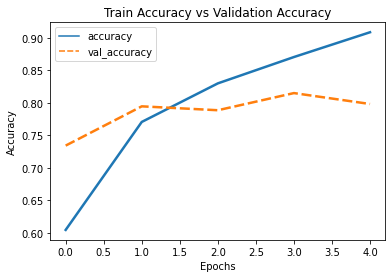

In [18]:
import seaborn as sns

# get prediction on validation dataset 
#y_pred = bilstm_cnn.predict(x_val)
#print('Accuracy on validation data = {:.4f}'.format(accuracy_score(y_val, y_pred)))

# plot accuracy on training and validation data
df_history = pd.DataFrame(history.history)

plt.title('Train Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

sns.lineplot(data=df_history[['accuracy','val_accuracy']], linewidth=2.5);

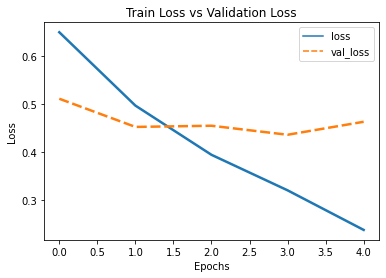

In [19]:
df_history = pd.DataFrame(history.history)

plt.title('Train Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

sns.lineplot(data=df_history[['loss','val_loss']], linewidth=2.5);

In [20]:
from sklearn.metrics import classification_report


rounded_predictions = cnn_bilstm.predict(x_val)
predictions = np.argmax(rounded_predictions,axis=1)
rounded_labels=np.argmax(y_val, axis=1)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(rounded_labels, predictions.round())
cm

array([[ 939,  319],
       [ 185, 1057]])

In [22]:
from sklearn.metrics import classification_report


rounded_predictions = cnn_bilstm.predict(x_val, batch_size=64, verbose=1)
predictions = np.argmax(rounded_predictions,axis=1)
rounded_labels=np.argmax(y_val, axis=1)

print(classification_report(predictions, rounded_labels))

40/40 [==============================] - 1s 26ms/step
              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1124
           1       0.85      0.77      0.81      1376

    accuracy                           0.80      2500
   macro avg       0.80      0.80      0.80      2500
weighted avg       0.80      0.80      0.80      2500



In [23]:
from sklearn import metrics

metrics.f1_score(rounded_labels, predictions, average='weighted', labels=np.unique(predictions))

0.7978888293215155

In [24]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(rounded_labels, predictions, average='weighted')

(0.8020040987337581, 0.7984, 0.7978888293215155, None)

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic')

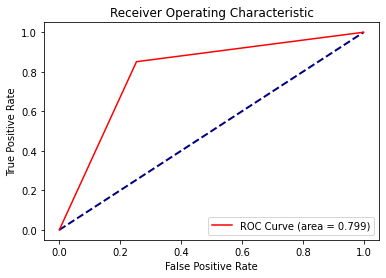

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics

fpr, tpr, thresholds = roc_curve(y_val.argmax(axis=1), predictions)
auc = auc(fpr, tpr)

fpr, tpr, thresholds = metrics.roc_curve(y_val.argmax(axis=1), predictions)
roc_auc = metrics.auc(fpr, tpr)

lw = 2
plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.plot(fpr, tpr, lw=lw, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot(fpr, tpr, color='red', label='ROC Curve (area = {:.3f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [26]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(rounded_labels, predictions)

print('Average precision-recall score: {}'.format(average_precision))

Average precision-recall score: 0.7277473551660861


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.73')

Text(0.5, 0, 'Recall')

Text(0, 0.5, 'Precision')

No handles with labels found to put in legend.


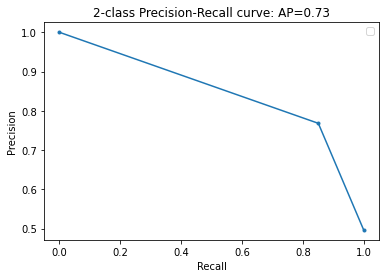

In [27]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(rounded_labels, predictions)

# plot the model precision-recall curve
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
pyplot.plot(recall, precision, marker='.')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend(loc = 'best')
# show the plot
pyplot.show()